# DS-SF-34 | 04 | Exploratory Data Analysis | Codealong | Starter Code

In [173]:
import os

import math

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 20)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

## Part A | Activity | The _pandas_ Library

In [174]:
df = pd.DataFrame({'name': ['Alice', 'Bob', 'Carol', 'Dave', 'Eve', 'Frank'],
    'gender': ['Female', 'Male', 'Female', 'Male', 'Female', 'Male'],
    'age': [24, 34, 44, 41, 52, 43],
    'marital_status': [0, 2, 1, 2, 0, 1]}).\
        set_index('name')

In [175]:
df

,age,gender,marital_status
name,,,
Alice,24,Female,0
Bob,34,Male,2
Carol,44,Female,1
Dave,41,Male,2
Eve,52,Female,0
Frank,43,Male,1


> ### Question 1.  Subset the dataframe on the age and gender columns

In [176]:
# TODO
df[['age','gender']]

,age,gender
name,,
Alice,24,Female
Bob,34,Male
Carol,44,Female
Dave,41,Male
Eve,52,Female
Frank,43,Male


> ### Question 2.  Subset the dataframe on the age column alone, first as a `DataFrame`, then as a `Series`

In [177]:
# TODO (DataFrame)
df[['age']]

,age
name,
Alice,24
Bob,34
Carol,44
Dave,41
Eve,52
Frank,43


In [178]:
# TODO (Series)
df['age'] #or df.age

name
Alice    24
Bob      34
Carol    44
Dave     41
Eve      52
Frank    43
Name: age, dtype: int64

> ### Question 3.  Subset the dataframe on the rows Bob and Carol

In [179]:
# TODO
df.loc[['Bob','Carol']][['age','gender']] #also, .loc takes 2 arguments: df.loc[['Bob','Carol']['age','gender']]

,age,gender
name,,
Bob,34,Male
Carol,44,Female


> ### Question 4.  Subset the dataframe on the row Eve alone, first as a `DataFrame`, then as a `Series`

In [180]:
# TODO (DataFrame)
df.loc[['Eve']]

,age,gender,marital_status
name,,,
Eve,52,Female,0


In [181]:
# TODO (Series)
df.loc['Eve']

age                   52
gender            Female
marital_status         0
Name: Eve, dtype: object

> ### Question 5.  How old is Frank?

In [182]:
# TODO
print df.loc['Frank']['age']
print df.loc['Frank'].age
print df.at['Frank','age']
print df.age['Frank']
print df.age.Frank #in dot syntax you need to call the column and then the row... unless....
print df.T.Frank.age #the T stands for transpose

43
43
43
43
43
43


> ### Question 6.  What is the men’s mean age, the women’s median age?

In [183]:
# TODO
df.groupby('gender').age.mean()

gender
Female    40.000000
Male      39.333333
Name: age, dtype: float64

## Part B

- `.mean()`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.mean.html)
- `.var()`, `.std()`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.var.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.var.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.std.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.std.html)

In [184]:
df = pd.read_csv(os.path.join('..', 'datasets', 'dataset-04-zillow.csv'), index_col = 'ID')

In [185]:
df

,Address,DateOfSale,SalePrice,IsAStudio,Beds,Baths,Size,LotSize,BuiltInYear
ID,,,,,,,,,
15063471,"55 Vandewater St APT 9, San Francisco, CA",12/4/15,0.7100,0,1,NaN,550,NaN,1980
15063505,"740 Francisco St, San Francisco, CA",11/30/15,2.1500,0,NaN,2.0,1430,2435,1948
15063609,"819 Francisco St, San Francisco, CA",11/12/15,5.6000,0,2,3.5,2040,3920,1976
15064044,"199 Chestnut St APT 5, San Francisco, CA",12/11/15,1.5000,0,1,1.0,1060,NaN,1930
15064257,"111 Chestnut St APT 403, San Francisco, CA",1/15/16,0.9700,0,2,2.0,1299,NaN,1993
15064295,"111 Chestnut St APT 702, San Francisco, CA",12/17/15,0.9400,0,2,2.0,1033,NaN,1993
15064391,"1821 Grant Ave APT 101, San Francisco, CA",12/15/15,0.8350,0,1,1.0,1048,NaN,1975
15064536,"2300 Leavenworth St, San Francisco, CA",12/4/15,2.8300,0,3,2.0,2115,1271,1913
15064640,"1047-1049 Lombard St, San Francisco, CA",1/14/16,4.0500,1,NaN,NaN,4102,3049,1948


### `Series.mean()` - Compute the `Series` mean value

In [186]:
df.SalePrice.mean()

1.3974229429999998

> #### Activity: What's `Size`'s mean?

In [187]:
# TODO
df.Size.mean()

1641.3009307135471

In [188]:
df.describe()

,SalePrice,IsAStudio,Beds,Baths,Size,LotSize,BuiltInYear
count,1000.000000,986.000000,836.000000,942.000000,967.000000,556.000000,975.000000
mean,1.397423,0.029412,2.572967,1.977548,1641.300931,3020.640288,1947.533333
std,1.736413,0.169043,1.250891,1.130334,1027.016175,2853.430139,38.021563
min,0.000001,0.000000,1.000000,1.000000,264.000000,44.000000,1870.000000
25%,0.800000,0.000000,2.000000,1.000000,1027.500000,2375.000000,1912.000000
50%,1.100000,0.000000,2.000000,2.000000,1350.000000,2622.000000,1939.000000
75%,1.532500,0.000000,3.000000,2.000000,1947.500000,3049.000000,1986.000000
max,32.700000,1.000000,9.000000,14.000000,11500.000000,47916.000000,2015.000000


> #### Activity: What fraction of the properties sold in the dataset are studios?

In [206]:
# TODO
df[df['IsAStudio'] == 1]

TypeError: 'numpy.int64' object is not callable

### `DataFrame.mean()` - Compute the `DataFrame` mean value

In [207]:
# TODO
df.mean()

SalePrice         1.397423
IsAStudio         0.029412
Beds              2.572967
Baths             1.977548
Size           1641.300931
LotSize        3020.640288
BuiltInYear    1947.533333
dtype: float64

### `.var()` - Compute the unbiased variance (normalized by `N-1` by default)

In [ ]:
# TODO

> #### Activity: What's the variance for the number of beds in the dataset?

In [ ]:
# TODO

### `.std()` - Compute the unbiased standard deviation (normalized by `N-1` by default)

In [ ]:
# TODO

> #### Activity: What's the standard deviation for the number of beds in the dataset?

In [ ]:
# TODO

## Part C

- `.median()`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.median.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.median.html)
- `.count()`, `.sum()`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.count.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.count.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sum.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.sum.html)
- `.count()`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html)
- `.min()`, `.max()`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.min.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.min.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.max.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.max.html)
- `.quantile()`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.quantile.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.quantile.html)
- `.describe()`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html)

### `.median()` - Compute the median value

In [ ]:
# TODO

> #### Activity: What's the median sale price for properties in the dataset?

In [ ]:
# TODO

### `.count()` - Compute the number of rows/observations without `NaN` and `.sum()` - Compute the sum of the values

In [ ]:
df.count()

In [ ]:
df.IsAStudio.count()

`count()` counts the number of non-`NaN` values:

In [ ]:
df.IsAStudio.dropna().shape[0]

In [ ]:
df.IsAStudio.isnull().sum()

Which leaves 14 houses for which we don't know if they are studios or not.

In [ ]:
df.IsAStudio.dropna().shape[0] + df.IsAStudio.isnull().sum()

In [ ]:
df.IsAStudio.sum()

29 properties are studios.

### `.min()` and `.max()` - Compute the minimum and maximum values

In [ ]:
df.min()

> #### Activity: What are properties that were sold at the lowest price?  At what price?

In [108]:
# TODO
min = df.SalePrice.min()
max = df.SalePrice.max()
# df.sort_values('SalePrice' ascending=False).tail(5)

> #### Activity: What are properties that were sold at the highest price?  At what price?

In [116]:
df.loc[df.SalePrice == min]

,Address,DateOfSale,SalePrice,IsAStudio,Beds,Baths,Size,LotSize,BuiltInYear
ID,,,,,,,,,
15149005,"251-253 Missouri St, San Francisco, CA",12/23/15,0.000001,0,7,6,2904,2482,1900


In [111]:
# TODO
df.loc[df.SalePrice == max]

,Address,DateOfSale,SalePrice,IsAStudio,Beds,Baths,Size,LotSize,BuiltInYear
ID,,,,,,,,,
15083161,"1825 Scott St, San Francisco, CA",11/23/15,32.7,0,NaN,1,1100,1694,1900


### `.quantile()` - Compute values at the given quantile

In [112]:
df.quantile(.5)

SalePrice         1.1
IsAStudio         0.0
Beds              2.0
Baths             2.0
Size           1350.0
LotSize        2622.0
BuiltInYear    1939.0
dtype: float64

In [113]:
df.median()

SalePrice         1.1
IsAStudio         0.0
Beds              2.0
Baths             2.0
Size           1350.0
LotSize        2622.0
BuiltInYear    1939.0
dtype: float64

In [114]:
df.quantile(.25)

SalePrice         0.8
IsAStudio         0.0
Beds              2.0
Baths             1.0
Size           1027.5
LotSize        2375.0
BuiltInYear    1912.0
dtype: float64

In [115]:
df.quantile(.75)

SalePrice         1.5325
IsAStudio         0.0000
Beds              3.0000
Baths             2.0000
Size           1947.5000
LotSize        3049.0000
BuiltInYear    1986.0000
dtype: float64

### `.describe()` - Generate various summary statistics

In [117]:
df.describe()

,SalePrice,IsAStudio,Beds,Baths,Size,LotSize,BuiltInYear
count,1000.000000,986.000000,836.000000,942.000000,967.000000,556.000000,975.000000
mean,1.397423,0.029412,2.572967,1.977548,1641.300931,3020.640288,1947.533333
std,1.736413,0.169043,1.250891,1.130334,1027.016175,2853.430139,38.021563
min,0.000001,0.000000,1.000000,1.000000,264.000000,44.000000,1870.000000
25%,0.800000,0.000000,2.000000,1.000000,1027.500000,2375.000000,1912.000000
50%,1.100000,0.000000,2.000000,2.000000,1350.000000,2622.000000,1939.000000
75%,1.532500,0.000000,3.000000,2.000000,1947.500000,3049.000000,1986.000000
max,32.700000,1.000000,9.000000,14.000000,11500.000000,47916.000000,2015.000000


In [118]:
df.SalePrice.describe()

count    1000.000000
mean        1.397423
std         1.736413
min         0.000001
25%         0.800000
50%         1.100000
75%         1.532500
max        32.700000
Name: SalePrice, dtype: float64

In [119]:
df.Address.describe()

count                                        1000
unique                                        993
top       1954 Golden Gate Ave, San Francisco, CA
freq                                            2
Name: Address, dtype: object

## Part D

- Boxplots
  - (http://pandas.pydata.org/pandas-docs/stable/visualization.html#box-plots)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) with `kind = 'box'`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html) with `kind = 'box'`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.boxplot.html)

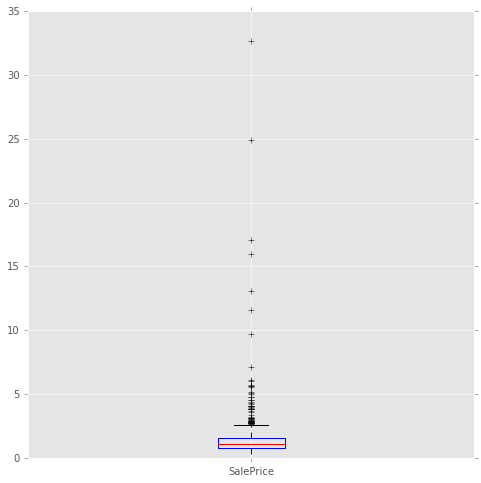

In [120]:
df.SalePrice.plot(kind = 'box', figsize = (8, 8))

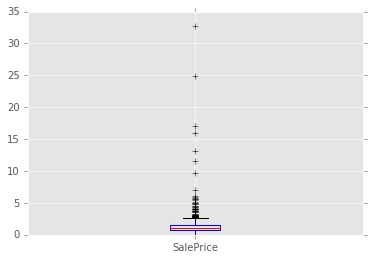

In [134]:
df[ ['SalePrice'] ].boxplot(figsize = (8, 8), return_type='axes')

> In the same plot, plot the boxplots of `Beds` and `Baths`

In [ ]:
# TODO

## Part E

- Histograms
  - (http://pandas.pydata.org/pandas-docs/stable/visualization.html#histograms)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) with `kind = 'hist'`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html) with `kind = 'hist'`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.hist.html)
  - ((http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.hist.html)

In [ ]:
df.Beds.plot(kind = 'hist', figsize = (8, 8))

In [ ]:
df.Beds.hist(figsize = (8, 8))

> #### Activity: In the same plot, plot the histograms of `Beds` and `Baths`

In [ ]:
# TODO

## Part F

- `.mode()`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mode.html)
  - ((http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.mode.html)

### `.mode()` - Compute the mode value(s)

In [123]:
df.mode()

,Address,DateOfSale,SalePrice,IsAStudio,Beds,Baths,Size,LotSize,BuiltInYear
0,"1 Mono St # B, San Francisco, CA",11/20/15,1.1,0,2,1,1000,2495,1900
1,"150 Grand View Ave, San Francisco, CA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"1915 Diamond St, San Francisco, CA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"1954 Golden Gate Ave, San Francisco, CA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"2299 Market St APT 502, San Francisco, CA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"643 Natoma St, San Francisco, CA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"829 Folsom St UNIT 906, San Francisco, CA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [124]:
df.Address.mode()

0             1 Mono St # B, San Francisco, CA
1        150 Grand View Ave, San Francisco, CA
2           1915 Diamond St, San Francisco, CA
3      1954 Golden Gate Ave, San Francisco, CA
4    2299 Market St APT 502, San Francisco, CA
5             643 Natoma St, San Francisco, CA
6    829 Folsom St UNIT 906, San Francisco, CA
dtype: object

In [125]:
df.Baths.mode()

0    1
dtype: float64

The `.mode()` method gets the mode(s) of each element along the columns.  Empty if nothing has 2+ occurrences. Adds a row for each mode per label, fills in gaps with `NaN`.  Note that there could be multiple values returned in the columns (when more than one value share the maximum frequency), which is the reason why a dataframe is returned.

In [122]:
df[df.Address == '1 Mono St # B, San Francisco, CA']

,Address,DateOfSale,SalePrice,IsAStudio,Beds,Baths,Size,LotSize,BuiltInYear
ID,,,,,,,,,
59700333,"1 Mono St # B, San Francisco, CA",12/11/15,1.08,0,2,1.5,1142,NaN,1968
59779608,"1 Mono St # B, San Francisco, CA",12/11/15,1.08,0,NaN,NaN,1142,NaN,1968


In [126]:
df[df.Address == '829 Folsom St UNIT 906, San Francisco, CA']

,Address,DateOfSale,SalePrice,IsAStudio,Beds,Baths,Size,LotSize,BuiltInYear
ID,,,,,,,,,
123597964,"829 Folsom St UNIT 906, San Francisco, CA",12/7/15,0.675,0,NaN,NaN,557,NaN,2010
2121978635,"829 Folsom St UNIT 906, San Francisco, CA",12/6/15,0.675,0,1,1,557,NaN,2010


In [127]:
df[df.Address == '1915 Diamond St, San Francisco, CA']

,Address,DateOfSale,SalePrice,IsAStudio,Beds,Baths,Size,LotSize,BuiltInYear
ID,,,,,,,,,
125156575,"1915 Diamond St, San Francisco, CA",12/30/15,1.8,0,NaN,1,2200,4316,1910
2100850402,"1915 Diamond St, San Francisco, CA",12/29/15,1.8,0,4,3,2400,4356,1910


In [128]:
df[df.Address == '1954 Golden Gate Ave, San Francisco, CA']

,Address,DateOfSale,SalePrice,IsAStudio,Beds,Baths,Size,LotSize,BuiltInYear
ID,,,,,,,,,
15084954,"1954 Golden Gate Ave, San Francisco, CA",11/24/15,1.1,0,2,1,1515,NaN,1895
123597223,"1954 Golden Gate Ave, San Francisco, CA",11/24/15,1.1,0,2,1,1275,NaN,1895


In [129]:
df[df.Address == '2299 Market St APT 502, San Francisco, CA']

,Address,DateOfSale,SalePrice,IsAStudio,Beds,Baths,Size,LotSize,BuiltInYear
ID,,,,,,,,,
124891624,"2299 Market St APT 502, San Francisco, CA",12/4/15,0.915,0,1,1,691,NaN,2013
2100902229,"2299 Market St APT 502, San Francisco, CA",12/3/15,0.915,0,1,1,700,NaN,2013


In [130]:
df[df.Address == '643 Natoma St, San Francisco, CA']

,Address,DateOfSale,SalePrice,IsAStudio,Beds,Baths,Size,LotSize,BuiltInYear
ID,,,,,,,,,
15147343,"643 Natoma St, San Francisco, CA",12/17/15,0.875,0,2,1,875,NaN,1910
123596761,"643 Natoma St, San Francisco, CA",12/17/15,0.875,0,2,1,830,NaN,1910


In [131]:
df[df.Address == '829 Folsom St UNIT 906, San Francisco, CA']

,Address,DateOfSale,SalePrice,IsAStudio,Beds,Baths,Size,LotSize,BuiltInYear
ID,,,,,,,,,
123597964,"829 Folsom St UNIT 906, San Francisco, CA",12/7/15,0.675,0,NaN,NaN,557,NaN,2010
2121978635,"829 Folsom St UNIT 906, San Francisco, CA",12/6/15,0.675,0,1,1,557,NaN,2010


All duplicate entries...

In [135]:
df[df.DateOfSale == '11/20/15']

,Address,DateOfSale,SalePrice,IsAStudio,Beds,Baths,Size,LotSize,BuiltInYear
ID,,,,,,,,,
15072263,"1795 Green St, San Francisco, CA",11/20/15,2.500,0,3,2.0,1647,NaN,1908
15073657,"1895 Pacific Ave APT 506, San Francisco, CA",11/20/15,0.975,0,1,1.0,1165,NaN,1931
15084143,"270 Ewing Ter, San Francisco, CA",11/20/15,1.570,0,2,1.0,1250,2178,1940
15093664,"591 29th Ave, San Francisco, CA",11/20/15,1.750,0,3,2.5,1800,1875,1936
15100149,"806 39th Ave, San Francisco, CA",11/20/15,1.050,0,NaN,1.0,1375,2374,1926
15104379,"1466 44th Ave, San Francisco, CA",11/20/15,0.892,0,2,1.0,1130,3049,1926
15104496,"1422 42nd Ave, San Francisco, CA",11/20/15,1.220,0,3,1.0,1325,2996,1951
15118458,"2279 47th Ave, San Francisco, CA",11/20/15,1.030,0,4,3.0,2570,2996,1900
15124103,"2514 40th Ave, San Francisco, CA",11/20/15,1.020,0,3,2.0,1490,3049,1945


In [136]:
df[df.DateOfSale == '11/20/15'].shape[0]

47

In [137]:
(df.DateOfSale == '11/20/15').sum()

47

## Part G

- `.corr()`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.corr.html)
- Heatmaps
  - (http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.matshow)
- Scatter plots
  - (http://pandas.pydata.org/pandas-docs/stable/visualization.html#scatter-plot)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) with `kind = 'scatter'`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html) with `kind = 'scatter'`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.scatter.html)
- Scatter matrices
  - (http://pandas.pydata.org/pandas-docs/stable/visualization.html#scatter-matrix-plot)

In [138]:
df.corr()

,SalePrice,IsAStudio,Beds,Baths,Size,LotSize,BuiltInYear
SalePrice,1.000000,0.008889,0.379453,0.369938,0.485379,0.392418,-0.148598
IsAStudio,0.008889,1.000000,NaN,-0.078195,0.052166,-0.012622,-0.050258
Beds,0.379453,NaN,1.000000,0.715194,0.722656,0.070542,-0.344700
Baths,0.369938,-0.078195,0.715194,1.000000,0.692501,0.108556,-0.078157
Size,0.485379,0.052166,0.722656,0.692501,1.000000,0.201979,-0.313989
LotSize,0.392418,-0.012622,0.070542,0.108556,0.201979,1.000000,0.046411
BuiltInYear,-0.148598,-0.050258,-0.344700,-0.078157,-0.313989,0.046411,1.000000


In [139]:
df.Beds.corr(df.Baths)

0.71519388432089859

### Heatmaps

In [140]:
corr = df.corr()

corr

,SalePrice,IsAStudio,Beds,Baths,Size,LotSize,BuiltInYear
SalePrice,1.000000,0.008889,0.379453,0.369938,0.485379,0.392418,-0.148598
IsAStudio,0.008889,1.000000,NaN,-0.078195,0.052166,-0.012622,-0.050258
Beds,0.379453,NaN,1.000000,0.715194,0.722656,0.070542,-0.344700
Baths,0.369938,-0.078195,0.715194,1.000000,0.692501,0.108556,-0.078157
Size,0.485379,0.052166,0.722656,0.692501,1.000000,0.201979,-0.313989
LotSize,0.392418,-0.012622,0.070542,0.108556,0.201979,1.000000,0.046411
BuiltInYear,-0.148598,-0.050258,-0.344700,-0.078157,-0.313989,0.046411,1.000000


In [ ]:
# TODO

Let's pretty this up.

In [141]:
list(corr.columns)

['SalePrice', 'IsAStudio', 'Beds', 'Baths', 'Size', 'LotSize', 'BuiltInYear']

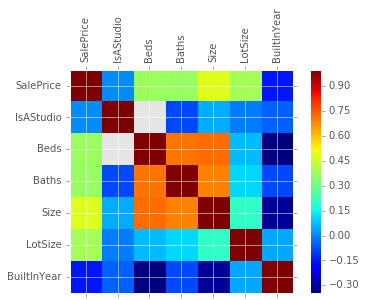

In [142]:
figure = plt.figure()
subplot = figure.add_subplot(1, 1, 1)
figure.colorbar(subplot.matshow(corr))
subplot.set_xticklabels([None] + list(corr.columns), rotation = 90)
subplot.set_yticklabels([None] + list(corr.columns))

### Scatter plots

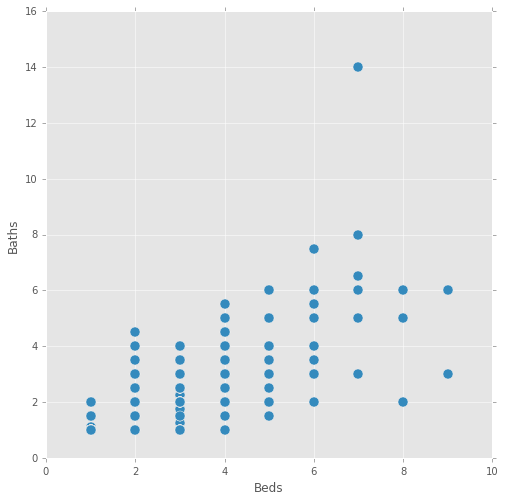

In [167]:
df.plot(kind = 'scatter', x = 'Beds', y = 'Baths', s = 100, figsize = (8, 8))

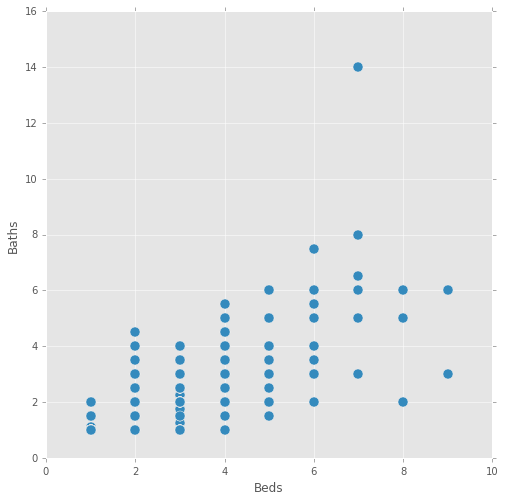

In [144]:
df.plot.scatter(x = 'Beds', y = 'Baths', s = 100, figsize = (8, 8))

### Scatter matrices

In [ ]:
pd.tools.plotting.scatter_matrix(df[ ['Beds', 'Baths'] ], diagonal = 'kde', s = 500, figsize = (8, 8))

In [ ]:
pd.tools.plotting.scatter_matrix(df[ ['SalePrice', 'Size'] ], s = 200, figsize = (8, 8))

## Part H

- `.value_counts()`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html)
- `.crosstab()`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.crosstab.html)

> #### Activity: Reproduce the `Beds` histogram above.  For each possible number of beds, how many properties share that bed count?

In [150]:
df.Beds.unique()

array([  1.,  nan,   2.,   3.,   5.,   4.,   7.,   6.,   8.,   9.])

In [172]:
# TODO
df.Beds.value_counts

<bound method Series.value_counts of ID
15063471       1
15063505     NaN
15063609       2
15064044       1
15064257       2
15064295       2
15064391       1
15064536       3
15064640     NaN
15064669       2
              ..
2108546010     2
2114498518     1
2121221385   NaN
2121978635     1
2122992200   NaN
2124214951   NaN
2126960082     1
2128308939     3
2131957929     2
2136213970     1
Name: Beds, dtype: float64>

> Careful on checking for `NaN` values!

In [147]:
# TODO
df.Beds.value_counts(dropna = False) #you have to specify if you want to count null values

> #### Activity: Create a frequency table for `Baths` over `Beds`

In [171]:
# TODO
pd.crosstab(df.Beds,df.Baths)

Baths,1.0,1.1,1.25,1.5,1.75,...,6.0,6.5,7.5,8.0,14.0
Beds,,,,,,,,,,,
1,116,1,0,7,0,...,0,0,0,0,0
2,133,0,0,19,0,...,0,0,0,0,0
3,39,0,1,9,1,...,0,0,0,0,0
4,1,0,0,1,0,...,0,0,0,0,0
5,0,0,0,1,0,...,3,0,0,0,0
6,0,0,0,0,0,...,1,0,1,0,0
7,0,0,0,0,0,...,1,1,0,1,1
8,0,0,0,0,0,...,1,0,0,0,0
9,0,0,0,0,0,...,2,0,0,0,0


> #### Activity: Create a frequency table for `Beds` and `Baths` (together) over the centry the houses were built

In [164]:
# TODO
pd.crosstab([df.Beds, df.Baths], pd.Series(df.BuiltInYear//100 * 100, name = 'Century')) #you can have more than one variable on one axis... 
                                                           #the // divides and rounds

Century     1800  1900  2000
Beds Baths                  
1    1.0       3    67    43
     1.1       0     0     1
     1.5       0     3     4
     2.0       1     4    12
2    1.0       2   123     2
     1.5       1    16     2
     2.0       1    66    69
     2.5       0     4     7
     3.0       0     6     2
     3.5       0     1     0
...          ...   ...   ...
7    5.0       0     1     0
     6.0       0     1     0
     6.5       0     1     0
     8.0       0     1     0
     14.0      0     0     1
8    2.0       0     1     0
     5.0       0     1     0
     6.0       0     1     0
9    3.0       0     1     0
     6.0       0     2     0

[58 rows x 3 columns]